# Step 1: Create User space

In [1]:
user_work_space = "/mnt/edward2"
# Create work directory
!mkdir -p $user_work_space
# Create using space
!mkdir -p $user_work_space/training/
!mkdir -p $user_work_space/pretrained_models/
!mkdir -p $user_work_space/datasets/
!mkdir -p $user_work_space/output/
# prepare training eviroment 
!cp -r /home/tensorflow-for-poets-2/ $user_work_space/training/
!rm $user_work_space/training/tensorflow-for-poets-2/tf_files/retrained_labels.txt
!rm -rf $user_work_space/training/tensorflow-for-poets-2/tf_files/flower_photos

# Step 2: Download, Explore,and Transform the Training Data

In [19]:
!cp -r /home/tensorflow-for-poets-2/tf_files/flower_photos $user_work_space/datasets/

/mnt/edward3


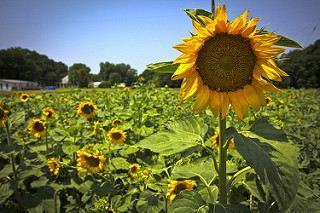

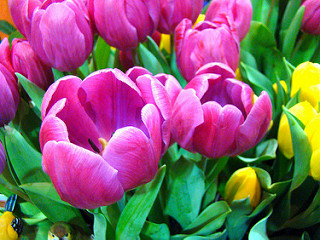

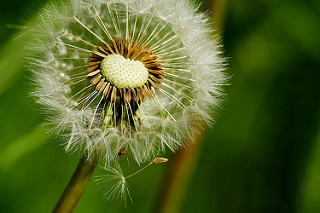

In [20]:
from IPython.display import Image
print(user_work_space);

listOfImageNames = [user_work_space+'/datasets/flower_photos/sunflowers/7176736574_14446539cb_n.jpg',
                   user_work_space+'/datasets/flower_photos/tulips/12916135413_dafcf3089e_n.jpg',
                   user_work_space+'/datasets/flower_photos/dandelion/7280217714_fb9ffccf2d_n.jpg']

for imageName in listOfImageNames:
    display(Image(filename=imageName))





# Step 3: Download Pre-trained Models

Pre-trained Models

| Model  | Million MACs | Million Parameters | Top-1 Accuracy| Top-5 Accuracy |
:----:|:------------:|:----------:|:-------:|:-------:|
[MobileNet_v1_1.0_224](http://download.tensorflow.org/models/mobilenet_v1_1.0_224_frozen.tgz)|569|4.24|70.9|89.9|
[MobileNet_v1_1.0_192](http://download.tensorflow.org/models/mobilenet_v1_1.0_192_frozen.tgz)|418|4.24|70.0|89.2|
[MobileNet_v1_1.0_160](http://download.tensorflow.org/models/mobilenet_v1_1.0_160_frozen.tgz)|291|4.24|68.0|87.7|
[MobileNet_v1_1.0_128](http://download.tensorflow.org/models/mobilenet_v1_1.0_128_frozen.tgz)|186|4.24|65.2|85.8|
[MobileNet_v1_0.75_224](http://download.tensorflow.org/models/mobilenet_v1_0.75_224_frozen.tgz)|317|2.59|68.4|88.2|
[MobileNet_v1_0.75_192](http://download.tensorflow.org/models/mobilenet_v1_0.75_192_frozen.tgz)|233|2.59|67.2|87.3|
[MobileNet_v1_0.75_160](http://download.tensorflow.org/models/mobilenet_v1_0.75_160_frozen.tgz)|162|2.59|65.3|86.0|
[MobileNet_v1_0.75_128](http://download.tensorflow.org/models/mobilenet_v1_0.75_128_frozen.tgz)|104|2.59|62.1|83.9|
[MobileNet_v1_0.50_224](http://download.tensorflow.org/models/mobilenet_v1_0.5_224_frozen.tgz)|150|1.34|63.3|84.9|
[MobileNet_v1_0.50_192](http://download.tensorflow.org/models/mobilenet_v1_0.5_192_frozen.tgz)|110|1.34|61.7|83.6|
[MobileNet_v1_0.50_160](http://download.tensorflow.org/models/mobilenet_v1_0.5_160_frozen.tgz)|77|1.34|59.1|81.9|
[MobileNet_v1_0.50_128](http://download.tensorflow.org/models/mobilenet_v1_0.5_128_frozen.tgz)|49|1.34|56.3|79.4|
[MobileNet_v1_0.25_224](http://download.tensorflow.org/models/mobilenet_v1_0.25_224_frozen.tgz)|41|0.47|49.8|74.2|
[MobileNet_v1_0.25_192](http://download.tensorflow.org/models/mobilenet_v1_0.25_192_frozen.tgz)|34|0.47|47.7|72.3|
[MobileNet_v1_0.25_160](http://download.tensorflow.org/models/mobilenet_v1_0.25_160_frozen.tgz)|21|0.47|45.5|70.3|
[MobileNet_v1_0.25_128](http://download.tensorflow.org/models/mobilenet_v1_0.25_128_frozen.tgz)|14|0.47|41.5|66.3|


### Download model

In [43]:
model_version="1.0_192"
models_name="mobilenet_v1_"+model_version
!cd $user_work_space/pretrained_models/
download_name="http://download.tensorflow.org/models/"
curl= download_name+models_name+"_frozen.tgz"
!echo $curl
!wget $curl

http://download.tensorflow.org/models/mobilenet_v1_1.0_192_frozen.tgz
--2019-06-28 02:56:26--  http://download.tensorflow.org/models/mobilenet_v1_1.0_192_frozen.tgz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.160.112, 2404:6800:4012:1::2010
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.160.112|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19157615 (18M) [application/gzip]
Saving to: ‘mobilenet_v1_1.0_192_frozen.tgz.1’

mobilenet_v1_1.0_19 100%[===================>]  18.27M  10.3MB/s    in 1.8s    

2019-06-28 02:56:28 (10.3 MB/s) - ‘mobilenet_v1_1.0_192_frozen.tgz.1’ saved [19157615/19157615]



# 開始訓練

# Step 4: Start Training

In [3]:
cd $user_work_space/training/tensorflow-for-poets-2

/mnt/edward2/training/tensorflow-for-poets-2


In [4]:
!rm -rf $user_work_space/training/tensorflow-for-poets-2/tf_files/training_summaries
#!rm -rf $user_work_space/training/tensorflow-for-poets-2/tf_files/bottlenecks
!rm $user_work_space/training/tensorflow-for-poets-2/tf_files/retrained_graph.pb
!rm $user_work_space/training/tensorflow-for-poets-2/tf_files/retrained_labels.txt
%run -i ./scripts/retrain\
--bottleneck_dir=tf_files/bottlenecks\
--how_many_training_steps=500\
--model_dir=tf_files/models/\
--summaries_dir=tf_files/training_summaries/mobilenet_1.0_224\
--output_graph=tf_files/retrained_graph.pb\
--output_labels=tf_files/retrained_labels.txt\
--architecture=mobilenet_1.0_224\
--image_dir=$user_work_space/datasets/flower_photos/

rm: cannot remove '/mnt/edward2/training/tensorflow-for-poets-2/tf_files/retrained_graph.pb': No such file or directory
rm: cannot remove '/mnt/edward2/training/tensorflow-for-poets-2/tf_files/retrained_labels.txt': No such file or directory


Instructions for updating:
Use tf.gfile.GFile.
INFO:tensorflow:Looking for images in 'daisy'
INFO:tensorflow:Looking for images in 'dandelion'
INFO:tensorflow:Looking for images in 'roses'
INFO:tensorflow:Looking for images in 'sunflowers'
INFO:tensorflow:Looking for images in 'tulips'
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4694730335_2553e77aa5_z.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/19834392829_7d697871f6.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4085794721_7cd88e0a6c_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/16360180712_b72695928c_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7568630428_8cf0fc16ff_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4993492878_11fd4f5d12.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Cre

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6910811638_aa6f17df23.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6776075110_1ea7a09dd4_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8719756744_34a5a83976_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/510844526_858b8fe4db.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1441939151_b271408c8d_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3640845041_80a92c4205_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/10993818044_4c19b86c82.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8983779970_9d3a6a3bf2_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3386988684_b

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14621687774_ec52811acd_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/813445367_187ecf080a_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5434914569_e9b982fde0_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2901376034_cdb4bac26b_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14569895116_32f0dcb0f9.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9922116524_ab4a2533fe_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/54377391_15648e8d18.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3625257860_33efeef614_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/9204730092_

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/107592979_aaa9cdfe78_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/695778683_890c46ebac.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/18442919723_d1251d3e14_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5684911529_88a7ae32ba_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/476857510_d2b30175de_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7288989324_c25d9febbf.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3310644753_5607eb96a4_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/18400014056_2e4c601ed5.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3275951182_d2

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/18023717391_e2c9089e10.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8964198962_6d8593b533.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2621723097_736febb4a4_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/305160642_53cde0f44f.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/17357636476_1953c07aa4_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1286274236_1d7ac84efb_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1656856503_447e5b0f03.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3504430338_77d6a7fab4_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2579018590_74

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/19177263840_6a316ea639.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/10555826524_423eb8bf71_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3704306975_75b74497d8.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14564545365_1f1d267bf1_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/20685027271_0e7306e7c1_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4496202781_1d8e776ff5_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5973488341_50bdf6cee3_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3456403987_5bd5fa6ece_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/147068

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/19019544592_b64469bf84_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3699235066_fc09a02dfe_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3337536080_1db19964fe.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/2520369272_1dcdb5a892_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/11834945233_a53b7a92ac_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3440366251_5b9bdf27c9_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7630520686_e3a61ac763.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4281102584_c548a69b81_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14167543

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4278442064_a5a598524b_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7454630692_ab2d67dd18_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/10172379554_b296050f82_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/18679421522_3be9879e32.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4131565290_0585c4dd5a_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3717746329_53f515c6a6_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:500 bottleneck files created.
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6054952060_c88612f3c5_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/16482676953_5296227d40_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating 

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/6529588249_d9cbe68aab_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5794835_d15905c7c8_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5739768868_9f982684f9_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/4814515275_6e25a6c18f.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/3764116502_f394428ee0_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/8071646795_2fdc89ab7a_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/19813618946_93818db7aa_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/7629784968_b953501902_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5512287917

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4226758402_a1b75ce3ac_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4568317687_3f89622f76.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6400843175_ef07053f8f_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17367866236_61abd4d243_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2634666217_d5ef87c9f7_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8724252904_db9a5104df_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5598591979_ed9af1b3e9_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3469112805_6cc8640236.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_f

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5996421299_b9bf488c1a_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4574736702_b15ecf97d0_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2598486434_bf349854f2_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9152356642_06ae73113f.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/1193386857_3ae53574f2_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3857059749_fe8ca621a9.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/1386449001_5d6da6bde6.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3459346147_faffff51c7_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_file

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17244252705_328e0bcda6.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19812060274_c432f603db.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5596093561_09b0301136_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/15819121091_26a5243340_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8905148527_ba9f55cd78.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6103898045_e066cdeedf_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/148180650_19a4b410db.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/20456824132_b1c8fbfa41_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_fil

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2831102668_eb65cd40b9_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4622115595_a0de9f2013_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4624036600_11a4744254_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8737699225_19e0c9f0fa_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/674407101_57676c40fb.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5651310874_c8be336c2b.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5757012454_c37f305b73.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7425858848_d04dab08dd_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8681420404_6ae114f036_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7308600792_27cff2f73f.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/20754920332_53b995fc63_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8831808134_315aedb37b.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17457028309_95514c8d02_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14171812905_8b81d50eb9_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2472641499_cbe617a93d.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2477231067_3aecef1bf8_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_f

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/144686365_d7e96941ee_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7196409186_a59957ce0b_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8613502159_d9ea67ba63.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14053397367_75cba846eb_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8475769_3dea463364_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8723679596_391a724d4f_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/13887066460_64156a9021.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5886830036_2b99899c95.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5797606814_ccac615312_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3530495617_fd84fb321a_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3451079245_2139200d66_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/11124381625_24b17662bd_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19437578578_6ab1b3c984.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/480621885_4c8b50fa11_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2076141453_c63801962a_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16970837587_4a9d8500d7.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/486234138_688e01aa9b_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17482158576_86c5ebc2f8.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4634716478_1cbcbee7ca.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/145173479_7d04346c20.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2039797043_d5b709f275_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4862011506_4faf6d127e_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8083321316_f62ea76f72_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7950892504_33142110c2.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/b

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/483097906_2c35054346.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5608832856_f5d49de778.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18001393975_2a6acaabd8.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/19506262462_d0945c14a6.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8952484062_31d1d97e45.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/4265711814_9a006ee5b8.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8647874151_aac8db2588_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8719032054_9a3ce4f0ff.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottl

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18183515403_13a9ca6d86_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8717787983_c83bdf39fe_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18282528206_7fb3166041.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2303491518_f25fee9440.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/11768468623_9399b5111b_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5605502523_05acb00ae7_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/61242541_a04395e6bc.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7162551630_3647eb9254.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/16495282564_d8c34d6a2e_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3509307596_6cfe97867d_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/9719816995_8f211abf02_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18276105805_d31d3f7e71.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8740218495_23858355d8_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8754822932_948afc7cef.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8681388520_c697dee897_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14058811536_f29cd7bd58_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3464015936_6845f46f64.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8717161615_4c1e403083.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/23192507093_2e6ec77bef_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/18342918441_b1bb69a2fd_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7270523166_b62fc9e5f1_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:1400 bottleneck files created.
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2467980325_237b14c737_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6994933428_307b092ce7_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/2635422362_a1bf641547_m.jpg_mobilenet_1.0_224

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/14886860069_b84665a073.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/3998927705_af499a4f29.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/17280886635_e384d91300_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/6132275522_ce46b33c33_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/468749497_951c571eff_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/8707349105_6d06b543b0.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/5676682203_70d797f760.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/dandelion/7280217714_fb9ffccf2d_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5360769702_ec28c53b9e_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5840476802_dfa40deb1f_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/12395698413_c0388278f7.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/269037241_07fceff56a_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14510185271_b5d75dd98e_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15333843782_060cef3030.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5156037859_1673720a11_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3554620445_082dd0bec4_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/28920569

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7376471712_e1be793f94.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/483444865_65962cea07_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/17305246720_1866d6303b.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3909587261_f8cd3e7fe7.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6687138903_ff6ae12758_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6255593451_b8a3aa8f7a_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/568715474_bdb64ccc32.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/11944957684_2cc806276e.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/7304710956_015b4

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5529341024_0c35f2657d.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16157873719_bf0bdf8558_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4356781875_92c5cd93c0.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8523394349_61b31fdd8f_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3921794817_276eb4386b.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2682566502_967e7eaa2a.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8562144481_1d629848ff.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2059172936_032ffc12aa.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/17040847367_b54d0

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15236835789_6009b8f33d.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4575042086_7674b76297_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/1645761726_2b1be95472.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6016195304_75306bb79a.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8442304572_2fdc9c7547_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/756943228_e15a7b2318.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/21346056089_e6f8074e5f_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6036837996_7fbdcdb3c5_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3971662839_5c

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16552686350_db8db55cd2.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5212877807_a3ddf06a7c_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3667366832_7a8017c528_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8063462557_e0a8bd6c64_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8983268106_dc913d17d8_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/24781114_bc83aa811e_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4998708839_c53ee536a8_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/319298955_0c72bd36bf.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15738649506_

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4797595918_79887b1229_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5060519573_c628547e20_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4713531680_1110a2fa07_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/5578766623_542c91dfaa_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2976723295_b16ab04231.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4654893119_45d232016b.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/14145188939_b4de638bd3_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3208417632_19138d8e35_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/721161667

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4360743371_6238b36d8c_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/13235124703_a7e1266e44.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15566697073_9a214b700e_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/2225411981_6638c3e988.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/488849503_63a290a8c2_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/8125886145_ae99f91fd0.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9160289562_ab2718d19b.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/3115889021_053f3b8e5a.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4061451210_1650

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/17554868955_35f48516cd_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6105809987_8f3d7a8d67_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16449467833_d82aac5749_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6864417932_36fa4ceecf_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6309548569_932fee8313_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/17953368844_be3d18cf30_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/6209630964_e8de48fe04_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/12045735155_42547ce4e9_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/39

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/12240165555_98625b1e88_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/16545641666_2781e542a0_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9406573080_60eab9278e_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/17165596357_392a12391f.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/12240303_80d87f77a3_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/15190665092_5c1c37a066_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/4608559939_3487bf3b62_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/9458445402_79e4dfa89c.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/roses/49515818

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/877083343_e3338c4125.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3734999477_7f454081aa_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9558632814_e78a780f4f.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6204049536_1ac4f09232_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2723995667_31f32294b4.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4745985619_249078cafa_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5927432662_3ffd2461c2_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/11881770944_22b4f2f8f6_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7510240282_87554c7418_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5293283002_9b17f085f7_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9497774935_a7daec5433_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4689061249_6498da5013.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/17433282043_441b0a07f4_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/678714585_addc9aaaef.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/200557979_a16112aac1_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6606813305_c992231d29_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck a

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/13096076565_72c2c60875_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5025805406_033cb03475_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4414081772_8a0e8a1327.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6050020905_881295ac72_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3594967811_697184b026_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5069564563_ae03792c3c_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14698136411_23bdcff7bf_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14121915990_4b76718077_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottle

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4019748730_ee09b39a43.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3146795631_d062f233c1.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4847062576_bae870479c_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/175638423_058c07afb9.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14814264272_4b39a102f9_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/45045003_30bbd0a142_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5951665793_8ae4807cbd_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7820398908_4316bbba45.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/19710076021_f5bb162540.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/1267876087_a1b3c63dc9.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/19453165201_2aa747e0bf.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15243175532_ac28c48e14_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8928658373_fdca5ff1b8.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4932735362_6e1017140f.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15683877266_42e0fe3782_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/164670176_9f5b9c7965.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8014735546_3db46bb1fe_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6606817351_10f6e43a09.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/215798357_3f4bfa27b7.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/16988605969_570329ff20_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7791014076_07a897cb85_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/193874852_fb633d8d00_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14741813010_5d44e33088_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8038712786_5bdeed3c7f_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck 

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4235259239_21f2eb4f2e.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9558630626_52a1b7d702_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/23894449029_bf0f34d35d_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14244273988_a7484f18b7_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8174935013_b16626b49b.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4186808407_06688641e2_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2816256710_a2d3616fae.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2307673262_e1e1aefd29.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8071460469_a7c2c34b97_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933229561_881d4673e7_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/22405887122_75eda1872f_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4414084638_03d2db38ae.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/2689228449_e0be72cf00_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/22416421196_caf131c9fa_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15030133005_9728102622_z.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5437996076_cf7e2ac32e_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottle

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20344366953_44fb51051b.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4932735566_2327bf319a.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15054865217_e398d0dc9f_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6080086410_17a02dcfb8.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6061177447_d8ce96aee0.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4893660821_eb7f02bef3_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/20753711039_0b11d24b50_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15207507116_8b7f894508_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck 

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4933230247_a0432f01da.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/215798354_429de28c2d.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9339697826_88c9c4dc50.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/4914793782_d0ea760791.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/7581713708_8eae6794f2.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15026703621_e15e9d55f0_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/8249000137_eddfffa380_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15054866658_c1a6223403_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6074427492_1b5bab7848_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/9461693602_710f20904f.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15460162172_014bcce403.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/14348961225_09bd803317_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/6606741847_f0198d83ff.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/5967284308_85714d8cf7_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/15240466871_ec45b65554_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/sunflowers/3846907701_e13b66aa87.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck a

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17907238905_1ae121f8d9_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3991742794_edebc6c8a0_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8713407768_f880df361f.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3909355648_42cb3a5e09_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7069622551_348d41c327_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7166644048_b00a14f01b.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3502085373_edc2c36992_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6931489544_2f35025f7b_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/443600168_cb08d56511.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/133692329_c1150ed811_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5674167473_ac696c8989_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/132538273_335240fe5b_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5691672942_70a93d70fc.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/130684927_a05164ba13_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:3000 bottleneck files created.
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13923539227_bdab038dc8.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/212720516_df4965ebda_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bo

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/11614202956_1dcf1c96a1.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3510799169_0ed6ae9669_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2470177960_7bd67db186_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/480228053_513791d474.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5674707464_dc18de05b1.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4522153453_06437ca3af_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6267021825_a8316e0dcc_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14078067903_92f5eb27ff.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/1686

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14116826873_d4bab623bf_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2254152047_d3bf8903cd_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/110147301_ad921e2828.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4522130258_9ee44cf73f_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4573822295_5c5c6a5f6a.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5665708521_799585d229_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16711791713_e54bc9c1af_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4580206494_9386c81ed8_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8713391394_4b679ea1e3_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16938892686_3613ea68e8_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14094114202_4c1d7f1116.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14090546015_504c8becd1.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5682463466_d3e641cb8b.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/6958343928_7e596da4ed_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5680695867_baff72fc7c.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7266196114_c2a736a15a_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7481204112_e3c57dd40a_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8817622133_a42bb90e38_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4521037085_70d5802e1d_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/10164073235_f29931d91e.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3238068295_b2a7b17f48_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2402342888_dd65677013.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13910719110_1b21d1fc81.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14491997336_36ba524713.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/86

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8729501081_b993185542_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13888320717_d2919a879b_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/251811158_75fa3034ff.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8686332852_c6dcb2e86b.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/924782410_94ed7913ca_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14090534565_5857ce4b7c_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2256230386_08b54ca760.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7166606598_5d2cd307c3.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/70647

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3449794006_8c289840aa.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3011223301_09b4e3edb7.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4838669164_ffb6f67139.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17295127995_62eff434fe_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/486896118_bcc7b8e1d6.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2785458179_9130812eef_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3511776685_3635087b12_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16862351376_f0fcc6fc91_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/4571

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/470690620_9d3a5bb239.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8713397358_0505cc0176_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5012813078_99fb977616_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7166564830_8b34a3fd35_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/7068715863_a534ac7884_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14275234071_6e6f473356.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5716293002_a8be6a6dd3_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13513616525_2ee0f049e1.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/44

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8713387500_6a9138b41b_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17199499591_67b64b21ed_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16732302779_8aa56f255d_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13289268363_b9337d751e.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3210019014_1bbd8bff20_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/17012955700_7141d29eee.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8394186551_28eed83a94_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/8713389178_66bceb71a8_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tuli

INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/14068200854_5c13668df9_m.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/2813649953_2b0f20fe94_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/3502974120_9f1eceaf8b_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/483880052_19fdb26a9f.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/19413898445_69344f9956_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/5738195260_b3fc107aa7_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/13974542496_e4b5d1c913_n.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulips/16265876844_0a149c4f76.jpg_mobilenet_1.0_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/tulip

INFO:tensorflow:2019-06-28 07:28:54.611268: Step 100: Train accuracy = 95.0%
INFO:tensorflow:2019-06-28 07:28:54.614444: Step 100: Cross entropy = 0.194151
INFO:tensorflow:2019-06-28 07:28:54.729682: Step 100: Validation accuracy = 90.0% (N=100)
INFO:tensorflow:2019-06-28 07:28:56.054440: Step 110: Train accuracy = 93.0%
INFO:tensorflow:2019-06-28 07:28:56.057458: Step 110: Cross entropy = 0.158937
INFO:tensorflow:2019-06-28 07:28:56.209572: Step 110: Validation accuracy = 89.0% (N=100)
INFO:tensorflow:2019-06-28 07:28:57.382066: Step 120: Train accuracy = 98.0%
INFO:tensorflow:2019-06-28 07:28:57.383766: Step 120: Cross entropy = 0.089951
INFO:tensorflow:2019-06-28 07:28:57.480971: Step 120: Validation accuracy = 89.0% (N=100)
INFO:tensorflow:2019-06-28 07:28:58.485273: Step 130: Train accuracy = 97.0%
INFO:tensorflow:2019-06-28 07:28:58.486895: Step 130: Cross entropy = 0.120858
INFO:tensorflow:2019-06-28 07:28:58.594725: Step 130: Validation accuracy = 90.0% (N=100)
INFO:tensorflow:

INFO:tensorflow:2019-06-28 07:29:32.762506: Step 430: Cross entropy = 0.088244
INFO:tensorflow:2019-06-28 07:29:32.866354: Step 430: Validation accuracy = 91.0% (N=100)
INFO:tensorflow:2019-06-28 07:29:33.860015: Step 440: Train accuracy = 99.0%
INFO:tensorflow:2019-06-28 07:29:33.863058: Step 440: Cross entropy = 0.054059
INFO:tensorflow:2019-06-28 07:29:33.991333: Step 440: Validation accuracy = 86.0% (N=100)
INFO:tensorflow:2019-06-28 07:29:34.890333: Step 450: Train accuracy = 99.0%
INFO:tensorflow:2019-06-28 07:29:34.893132: Step 450: Cross entropy = 0.077544
INFO:tensorflow:2019-06-28 07:29:34.982207: Step 450: Validation accuracy = 88.0% (N=100)
INFO:tensorflow:2019-06-28 07:29:35.982359: Step 460: Train accuracy = 100.0%
INFO:tensorflow:2019-06-28 07:29:35.985687: Step 460: Cross entropy = 0.056990
INFO:tensorflow:2019-06-28 07:29:36.088159: Step 460: Validation accuracy = 89.0% (N=100)
INFO:tensorflow:2019-06-28 07:29:37.075530: Step 470: Train accuracy = 100.0%
INFO:tensorflo

# 測試圖片

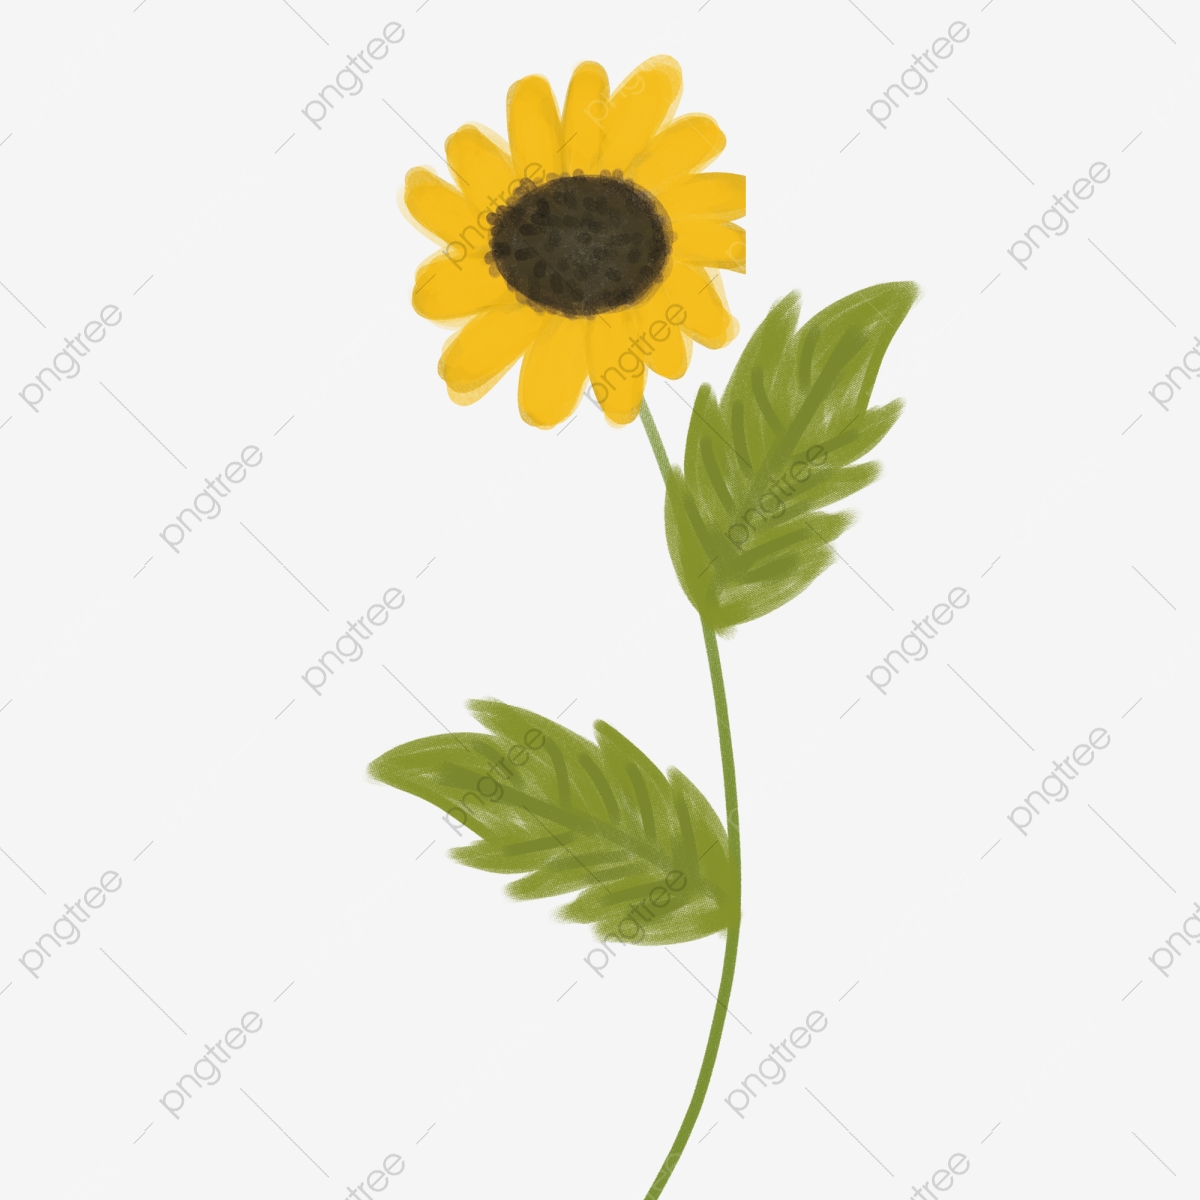

In [8]:
from IPython.display import Image
DEMO_PATH ="/home/flower_test2.jpeg"
Image(filename =DEMO_PATH,width=300,height=300)

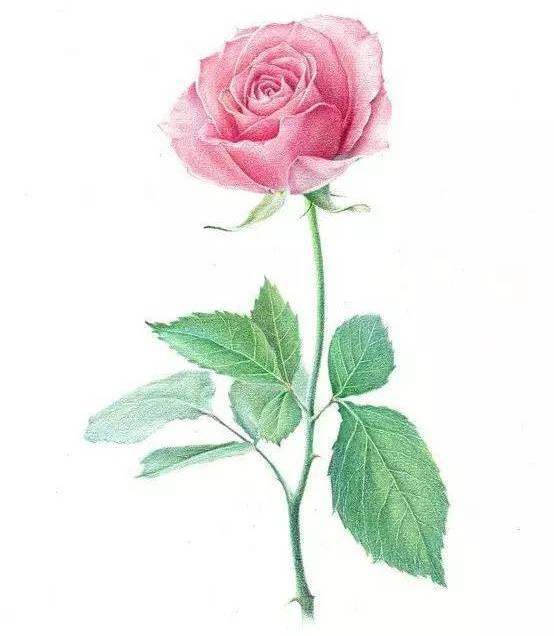

In [33]:
from IPython.display import Image
DEMO_PATH ="/home/flower_test4.jpeg"
Image(filename =DEMO_PATH,width=300,height=300)

# 辨識圖片

In [47]:
%run -i ./scripts/label_image --graph=tf_files/retrained_graph.pb --image=/home/flower_test4.jpeg


Evaluation time (1-image): 0.551s

roses (score=0.94995)
daisy (score=0.02240)
tulips (score=0.01482)
dandelion (score=0.01084)
sunflowers (score=0.00198)
